# <Center >Time Series Analysis

## <Center> Rossmann Store Sales

### By Chirapa Muadchan

### Objective
- To leverage Artificial Intelligence and Machine learning for developing time series forcasing models 
- To predict future product prices based on features


### Data Source
 https://www.kaggle.com/c/rossmann-store-sales/data
 
 Forecast sales using store, promotion, and competitor data

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading data

In [3]:
sales_train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/RealWorldProjects/3. Sales Department Data/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
store_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/RealWorldProjects/3. Sales Department Data/store.csv')

In [5]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
sales_train_df.shape

(1017209, 9)

sales data has 1017209 rows and 9 columns

### Important features

In [7]:
sales_train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [8]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


- Store: Unique store ID 
- DayOfWeek: 
- Sales: Sales per day
- Date: the sale date
- Customers: The number of customers in each sale day
- Open: Whether a store is open or not--> 0 = closed, 1 = opened 
- Promo: Whether a store has a promotion on that day --> 0 = No, 1 = Yes
- StateHoliday: If it is a holiday? --> a = publicholiday, b = Easterholiday, c= Christmas, 0 = none
- SchoolHoliday if the store was affected by the closure of public school

In [9]:
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
store_df.shape

(1115, 10)

Store data has 1115 rows and 10 columns.

### Important Features for Store dataset

In [11]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


- Store: a unique store ID
- StoreType: categorical variable to indicate type of store (a, b, c, d)
- Assortment: describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance (meters): distance to closest competitor store
- CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
- Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
- Promo2Since [Year/Week]: date when the store started participating in Promo2
- PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store





In [12]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Data Cleaning

In [13]:
## Check if sales data has any missing values
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

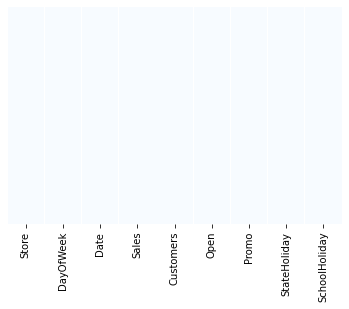

In [14]:
sns.heatmap(sales_train_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

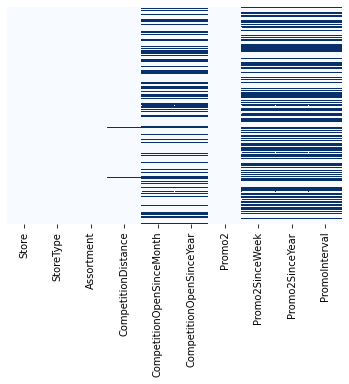

In [15]:
sns.heatmap(store_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [16]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

- 'CompetitionOpenSinceMonth' column has 354 missing values. 
- 'CompetitionOpenSinceYear' column has 354 missing values. 
- 'Promo2SinceWeek' column has 544 missing values. 
- 'Promo2SinceYear' column has 544 missing values. 
- 'PromoInterval' column has   544 missing values. 

In [17]:
store_df[ store_df['Promo2'] == 0].isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            2
CompetitionOpenSinceMonth    148
CompetitionOpenSinceYear     148
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

- When Promo2 is ,a continuing and consecutive promotion for some stores, 0. This refers to those stores which are not participating promotions. Hence, We can see that those missing values from other columns are from not participating stores.

In [18]:
store_df['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [19]:
store_df['Promo2SinceYear'].unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [20]:
store_df['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [21]:
store_df['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [22]:
store_df['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [23]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

for str in str_cols:
    store_df [str].fillna(0, inplace = True)

Then, we can fill NAs with 0 for those columns.

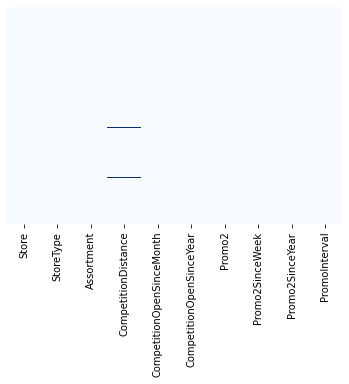

In [24]:
 sns.heatmap(store_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [25]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace = True)

Also, we can fill NAs in 'competitionDistance' column with the mean value.

In [26]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Finally, we have a clean dataset without any missing value.

### Data Exploration

In [27]:
sales_train_df['Customers'].max()

7388

In [28]:
sales_train_df['Sales'].max()

41551

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5b9fb3cd0>,
      dtype=object)

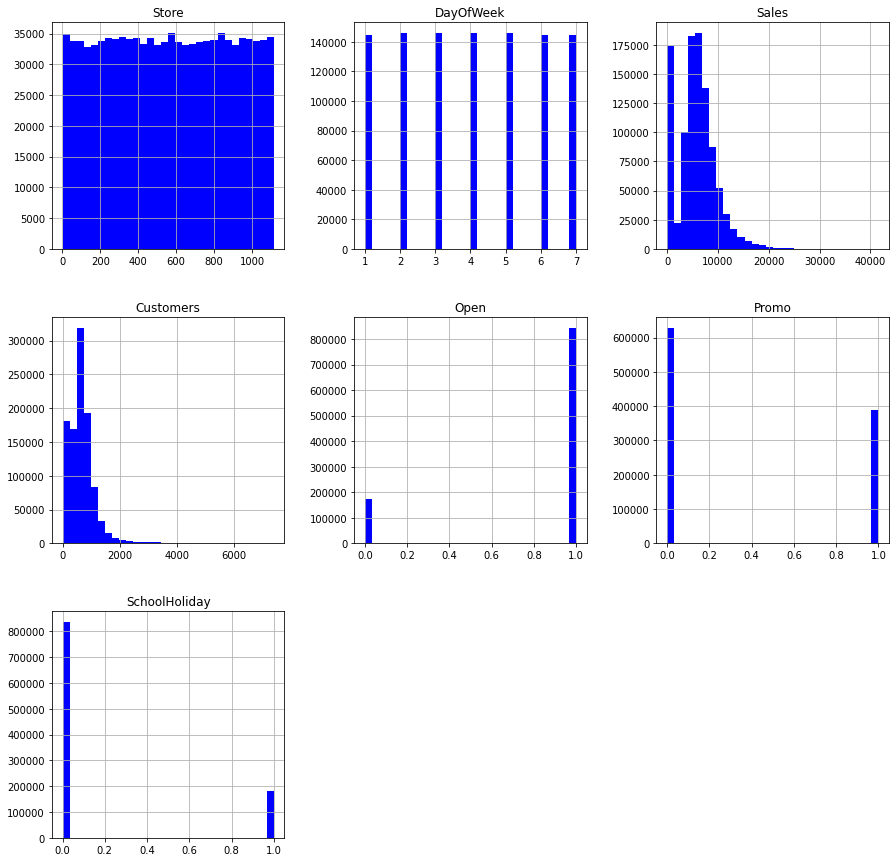

In [29]:
sales_train_df.hist(bins = 30, figsize = (15,15), color = 'b')

- Data is equally distributed among all stores (no bias).
- Data is equally distibuted across 7 Days of the week. 
- Stores are open appropriately 80% of the time.
- Promo1 was running approximately 40% of the time. 
- School holidays are around 18% of the time.

In [30]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


We can see it clearly, 
- The average sales amount per day is 6955 Euros.
- THe minimum sales per day is 0. 
- The maximum sales per day is 41551.
- The average number of customers is 762. 
- The minimum number of customers is 0. 
- Also, the maximum number of customers is 7388.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5b99a7e50>,
      dtype=object)

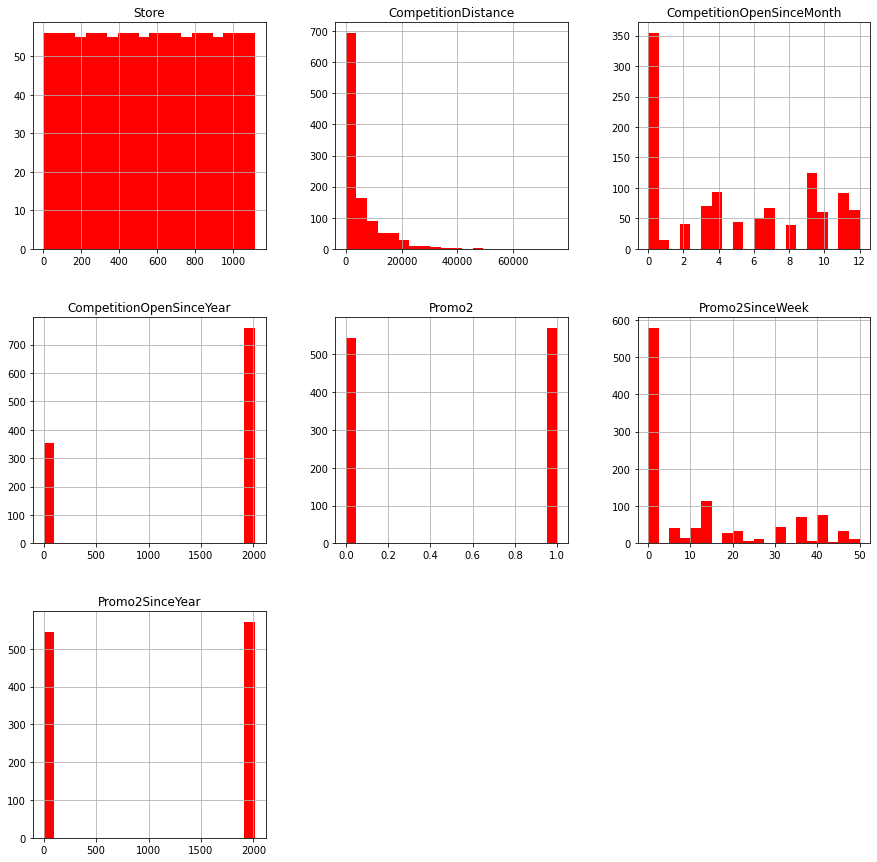

In [31]:
store_df.hist(bins = 20, figsize = (15,15), color = 'r')
# half of stores are involved in promo 2
# half of the stores have their competition at a distance of 0-3000m (3 kms away)

- Data is equally distributed among all stores (no bias).

### Data Wrangling

In [32]:
## Divide data into close_train_df and open_train_df  
closed_train_df        = sales_train_df[sales_train_df['Open'] == 0]
open_train_df          = sales_train_df[sales_train_df['Open'] == 1]

In [33]:
print("Total is", sales_train_df.shape[0])
print("The number of closed stores is", closed_train_df.shape[0])
print("The number of open stores is", open_train_df.shape[0])

Total is 1017209
The number of closed stores is 172817
The number of open stores is 844392


In [34]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

Here we keep only open store data.

In [35]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [36]:
len(sales_train_df)

844392

Now, sales data we have is only for open stores.

In [37]:
sales_train_df.drop(['Open'], axis=1, inplace=True)

In [38]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [39]:
# Let's merge both data frames together based on 'store' column
merged_sales_store_df = pd.merge(sales_train_df, store_df, how = 'inner', on = 'Store') 

In [40]:
merged_sales_store_df.to_csv('test.csv', index=False)

In [41]:
merged_sales_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [42]:
merged_sales_store_df.shape

(844392, 17)

There are 844392 open stores.

In [43]:
## Work with datetime library to creat columns of 'Year', 'Month', and 'Day'
merged_sales_store_df['Year'] = pd.DatetimeIndex(merged_sales_store_df['Date']).year
merged_sales_store_df['Month'] = pd.DatetimeIndex(merged_sales_store_df['Date']).month
merged_sales_store_df['Day'] = pd.DatetimeIndex(merged_sales_store_df['Date']).day

In [44]:
merged_sales_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


### Data Visualization

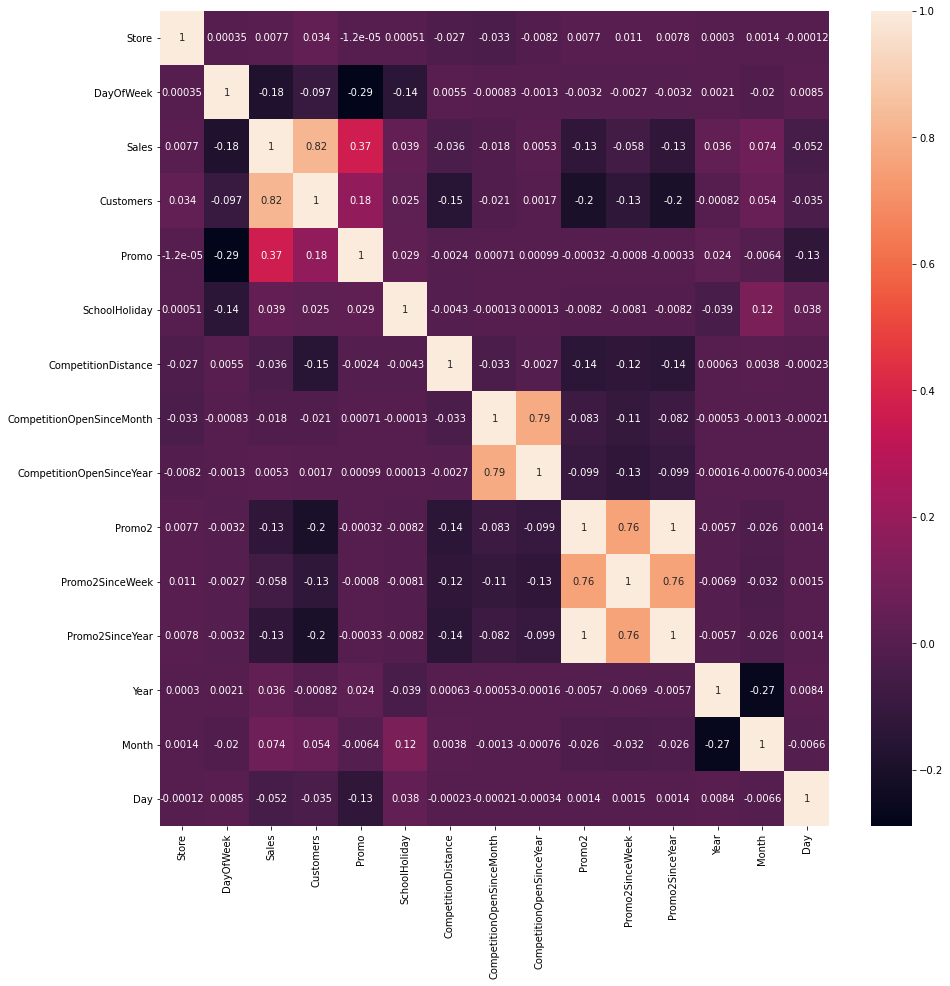

In [45]:
correlations = merged_sales_store_df.corr()
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(correlations, annot = True)
# Customers/Prmo2 and sales are strongly correlated 

In [46]:
correlations = merged_sales_store_df.corr()['Sales'].sort_values()
correlations

# customers and promo are positively correlated with the sales 
# Promo2 does not seem to be effective at all 

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
Day                         -0.051849
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
Year                         0.036169
SchoolHoliday                0.038617
Month                        0.073600
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64


- The number of customers and Promo are positively correlated with the sales 
- Promo2 does not significantly affect on the sales.

In [47]:
StoreTypes_df = merged_sales_store_df.groupby('StoreType').sum('Sales')
StoreTypes_df = StoreTypes_df[[ 'Promo', 'Promo2','Customers', 'SchoolHoliday', 'Sales']]
StoreTypes_df

,Promo,Promo2,Customers,SchoolHoliday,Sales
StoreType,,,,,
a,204521,213018,363541434,88810,3165334859
b,5940,4492,31465621,2878,159231395
c,50738,56215,92129705,22184,783221426
d,115697,147360,156904995,49585,1765392943


In [48]:
list(StoreTypes_df['Promo'])

[204521, 5940, 50738, 115697]

In [49]:
import matplotlib.pyplot as plt


def Stacked_Barchart(df):
    
    data = df
    labels = ['A', 'B', 'C', 'D']
    promo_N = list(df['Promo'])
    promo2_N = list(df['Promo2'])
    width = 0.25       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots(figsize=(10, 8))


    ax.bar(labels, promo_N, width, label='Promo',color='lightgrey') #yerr=men_std, 
    ax.bar(labels, promo2_N, width, bottom=promo_N, # yerr=women_std
           label='Promo2',color='salmon')

    ax.set_ylabel('Promotion (Count)')
    ax.set_xlabel('Store_Type')
    ax.set_title('The number of times runing each promotion of 4 different types of stores')

    ax.legend()
    for rec in ax.patches:
        width = rec.get_width()
        height = rec.get_height()
        ax.text(rec.get_x() + rec.get_width()/2 , 
                  rec.get_y() + height ,
                  "{:.0f}".format(height),
                  ha='center', 
                  va='top')

    
    return  plt



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

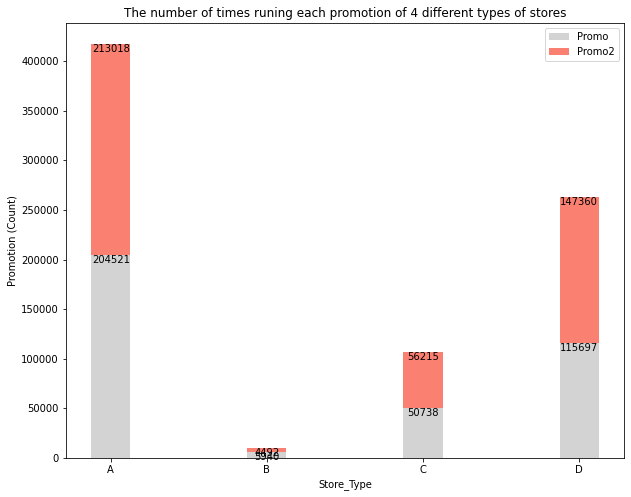

In [50]:
Stacked_Barchart(StoreTypes_df)

- From the bar chart, we clearly see that Store A has mostly run promotions when conpared to others.

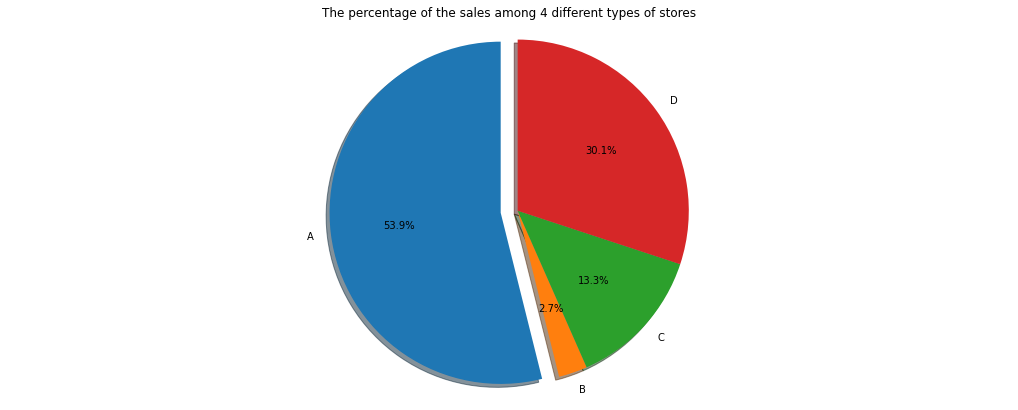

In [51]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = ['A', 'B', 'C', 'D']
sizes = list(StoreTypes_df['Sales'])
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(18, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('The percentage of the sales among 4 different types of stores')
plt.show()

- This pie chart above demonstrates the percentage of the sales accross 4 diferrent types of stores. It can be seen that the store Type A makes more total income when compared to the others which about 53.9%.

From 2 visualizations above, we can conclude that runing promotions really does affect on the sales.

#### The number of the sales and customers by month.

Text(0.5, 1.0, 'The average customers per month')

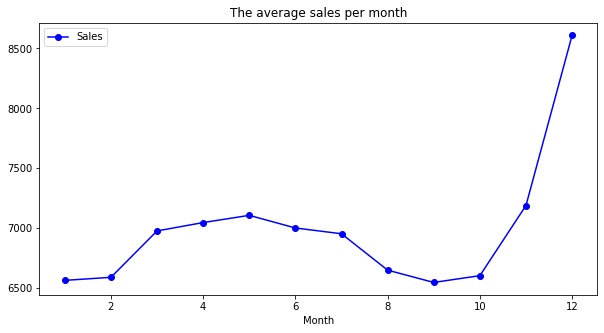

<Figure size 432x288 with 0 Axes>

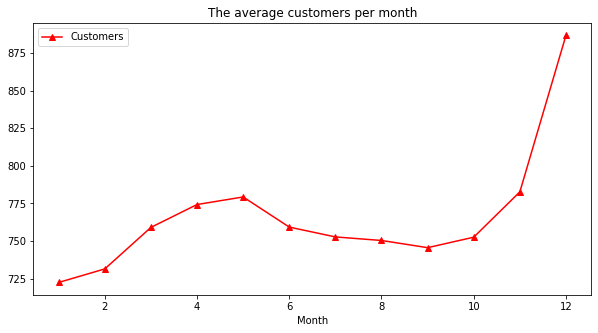

In [52]:
axis = merged_sales_store_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'b')
axis.set_title('The average sales per month')

plt.figure()
axis = merged_sales_store_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'r')
axis.set_title('The average customers per month')

- The trends of both graphs (Sales, Customer) above are the same. We can see that on the 12th month the sales went up dramatically due to incresing the number of customers. Hence, we could make an assume that in that period of time might be shopping of people for Christmas's and New Year's day.

#### The number of the sales and customers by day.

Text(0.5, 1.0, 'The average sales per day')

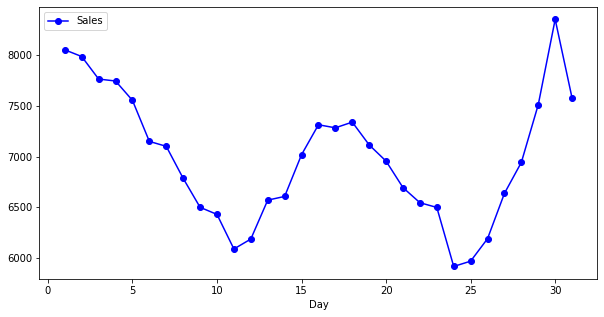

<Figure size 432x288 with 0 Axes>

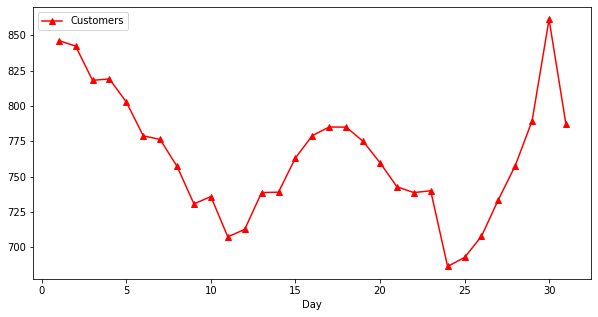

In [53]:

ax = merged_sales_store_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'b')
axis.set_title('The average sales per day')

plt.figure()
ax = merged_sales_store_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'r')
axis.set_title('The average sales per day')


From graphs above, we can see that the sales are related to the number of customers.
Customers made most purchases on the beginning and the end of the month. Also on 15th the sales greatly increased when compare to other days.

#### The number of the sales and customers by day in a week.

Text(0.5, 1.0, 'The average customers per day of the week')

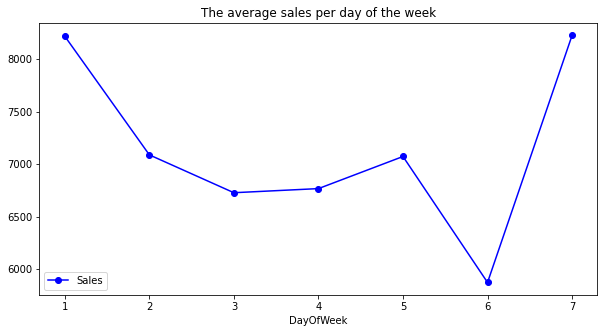

<Figure size 432x288 with 0 Axes>

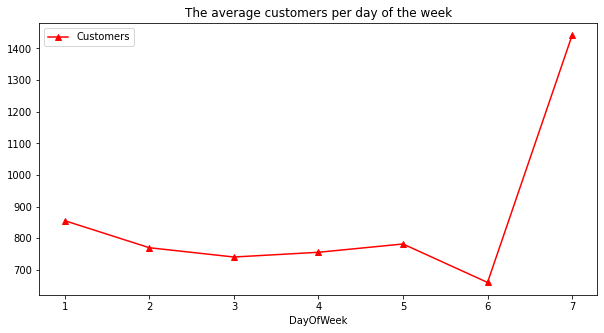

In [54]:
axis = merged_sales_store_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'b')
axis.set_title('The average sales per day of the week')

plt.figure()
axis = merged_sales_store_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'r')
axis.set_title('The average customers per day of the week')


Most people came to shop on the weekend more than the weekday.

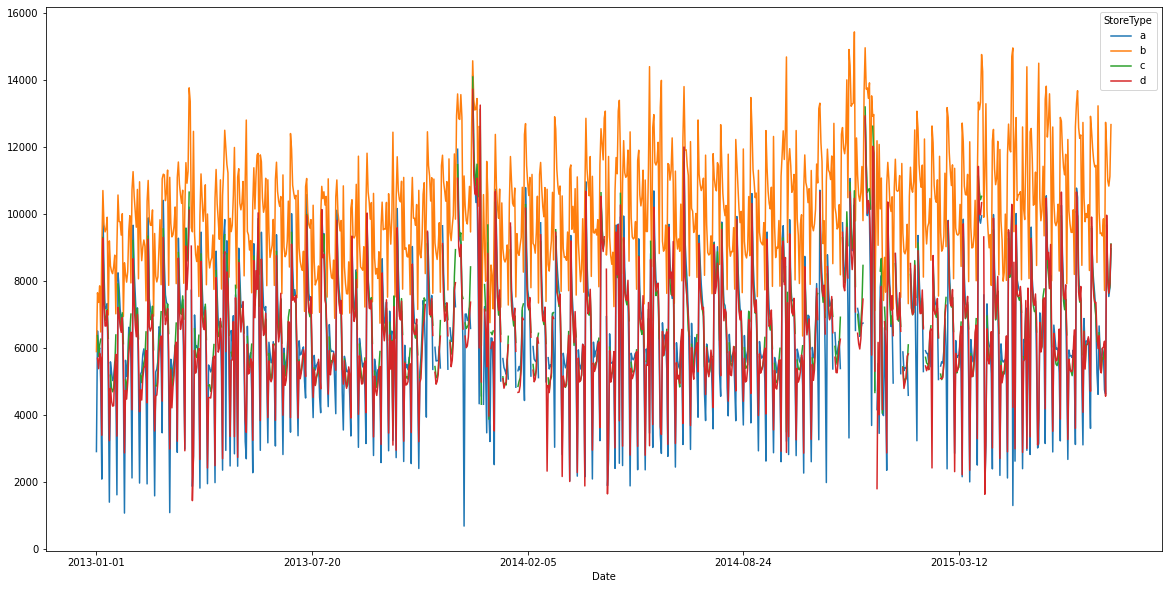

In [55]:
fig, ax = plt.subplots(figsize=(20,10))
merged_sales_store_df.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax=ax)

- This plot above shows the sales from 2013 to 2015 divided into 4 different store types.
- Store type b made the highest average sales when compared to others follwing by Store type c, d and a over the past 3 years.


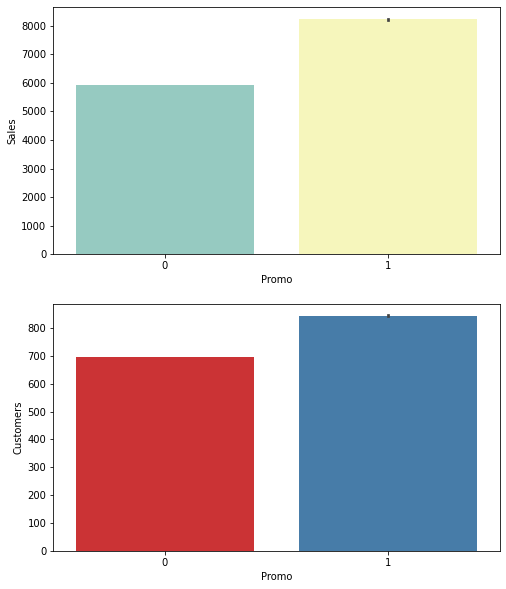

In [56]:
plt.figure(figsize=[8,10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = merged_sales_store_df,  palette = 'Set3')

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = merged_sales_store_df,  palette = 'Set1')

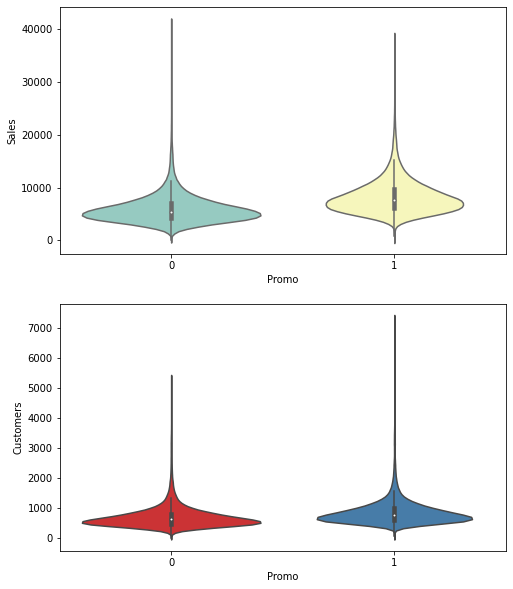

In [57]:
plt.figure(figsize=[8,10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = merged_sales_store_df,  palette = 'Set3')

plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = merged_sales_store_df,  palette = 'Set1')

From 2 charts above, we can conclude that creating does running promotions positively affect on the sales and the numbers of customers.

### Time series analysis utilizing Facebook Prophet

## Modeling 

### The next 60 days sale forcasting.

In [58]:
!pip install fbprophet
from fbprophet import Prophet

In [59]:
def sales_prediction(Store_ID, sales_df, periods):
  # Function that takes in the data frame, storeID, and number of future period forecast
  # The function then generates date/sales columns in Prophet format
  # The function then makes time series predictions

  sales_df = sales_df[ sales_df['Store'] == Store_ID ]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')
  
  model    = Prophet() ##initializong the model
  model.fit(sales_df)
  future   = model.make_future_dataframe(periods=periods) 
  forecast = model.predict(future)
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2  = model.plot_components(forecast)
  return future, figure, figure2

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(<Figure size 648x648 with 3 Axes>,)

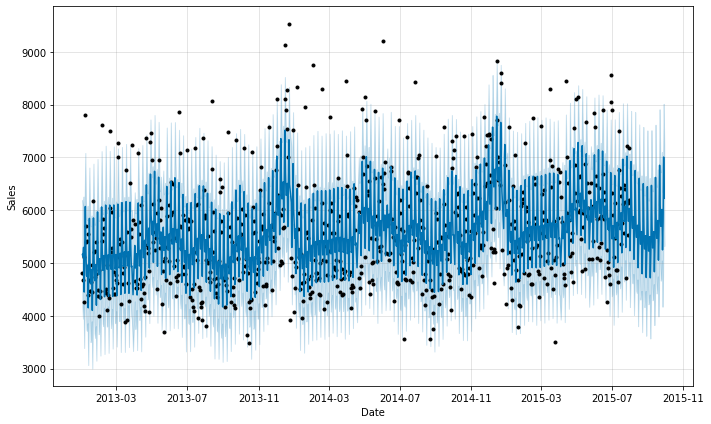

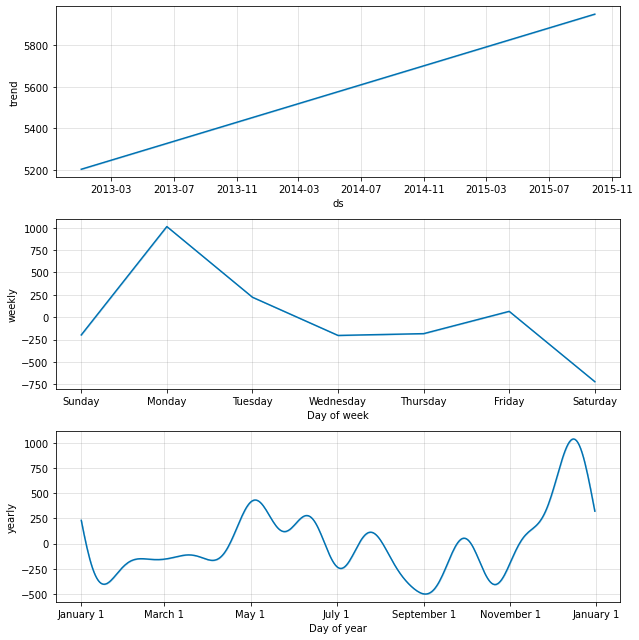

In [60]:
sales_prediction(10, merged_sales_store_df, 60)[2:3] ## predict for the next 60 days

#### From the next 60 days sales forcast for general days.
- The yearly sales increased gradually until November, 2015.
- For weekly trend, we can see that the sales reached to the peak on Monday before droping dramatically on Wednesday and raising slightly up on Friday. Finally, the sales went down agian on Saturday.
- Furthermore, we cam see that the sales reached the peak from November untill January.

### Holiday sale forcasting for the next 90 days


   - StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
   - SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
  






In [61]:
def sales_prediction(Store_ID, sales_df, holidays, periods):
  # Function that takes in the storeID and returns two date/sales columns in Prophet format
  # Format data to fit prophet 

  sales_df = sales_df[ sales_df['Store'] == Store_ID ]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')
  
  model    = Prophet(holidays = holidays)
  model.fit(sales_df)
  future   = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2  = model.plot_components(forecast)
  return future, figure, figure2

In [62]:
# Get all the dates pertaining to school holidays 
school_holidays = merged_sales_store_df[merged_sales_store_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [63]:
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [64]:
# Get all the dates pertaining to state holidays 
state_holidays = merged_sales_store_df[ (merged_sales_store_df['StateHoliday'] == 'a') | (merged_sales_store_df['StateHoliday'] == 'b') | (merged_sales_store_df['StateHoliday'] == 'c')  ].loc[:, 'Date'].values
state_holidays.shape

(910,)

In [65]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})

In [66]:
state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


In [67]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                                'holiday': 'school_holiday'})

In [68]:
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [69]:
# concatenate both school and state holidays 
school_state_holidays = pd.concat((state_holidays, school_holidays))

In [70]:
school_state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


### Predictions using holidays for a specific store

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(<Figure size 648x864 with 4 Axes>,)

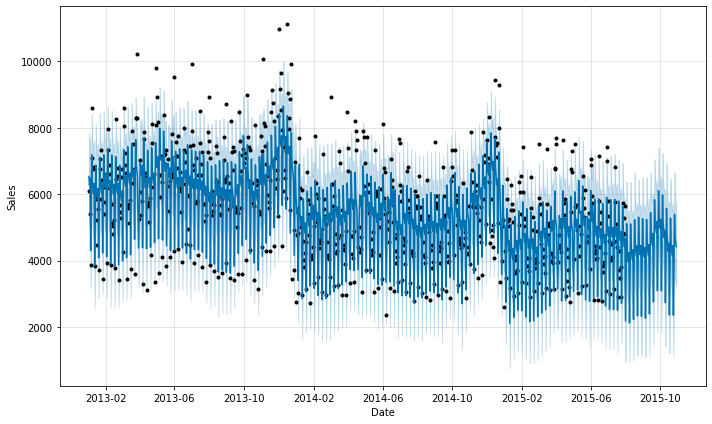

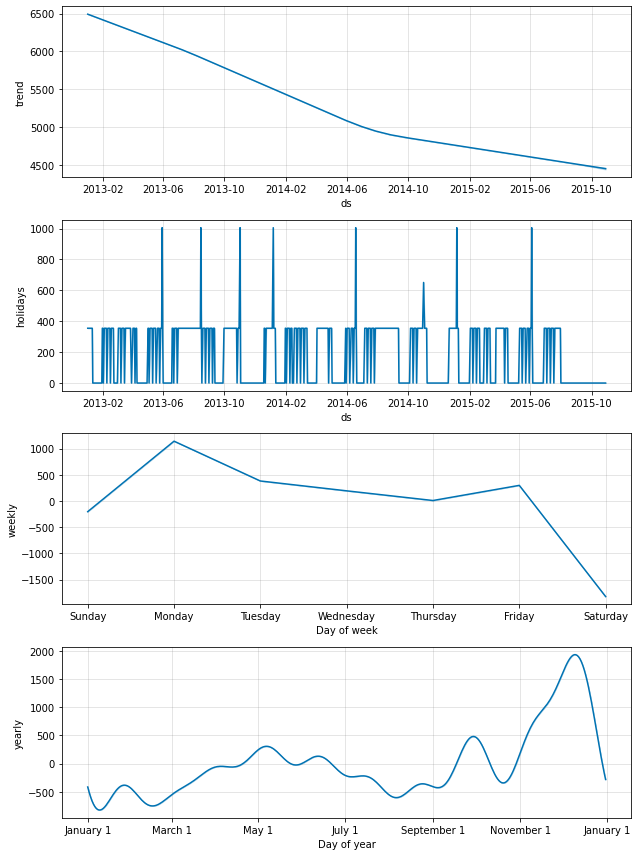

In [71]:
# Let's make predictions using holidays for a specific store
sales_prediction(6, merged_sales_store_df,school_state_holidays, 90)[2:3]

#### From the next 90 days holiday sale forcasting,
- The yearly sales decreased gradually until October, 2015.
- For weekly trend, we can see that the sales reached to the peak on Monday before droping gradually on Tuesday and raising slightly up on Friday. Finally, the sales went down agian on Saturday.
- Furthermore, we cam see that the sales reached the peak from November untill December.

Findings
- Running "Promo" affect on increasing of sales and the numbers of customers.
- Running "Promo2" does not positively affect on increasing of sales and the numbers of customers.
- The numder of promotions run help improving the sales.
- Overall, stores make more sales on Monday and Friday, but less sales on Wednesday.
- In the period of Chistmas holiday, the sales clearly reached to the peak. 
- The sales will grow up yearly based on the future prediction.

